In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA

# Analyse the data using the visualizations

In [2]:
zoo = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/KNN/Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Plot distribution of animal types

Text(0, 0.5, 'Count')

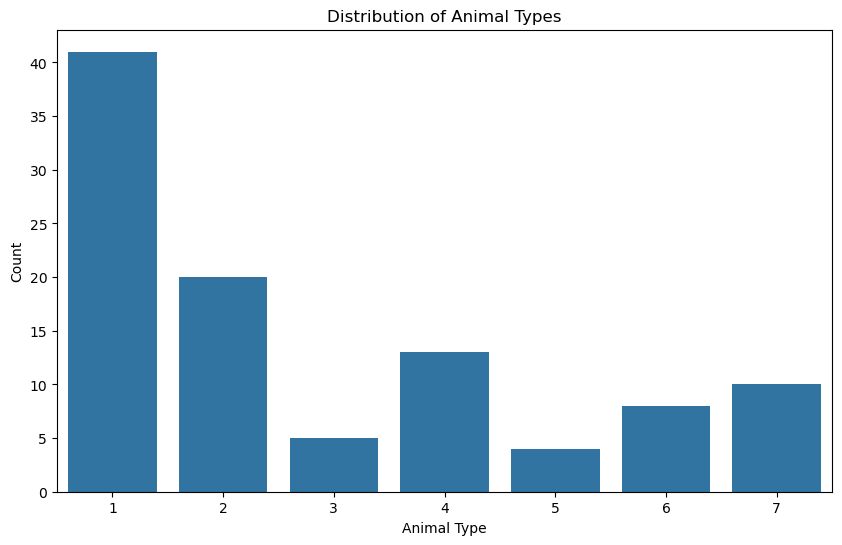

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=zoo)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')

Correlation heatmap for numerical features

Text(0.5, 1.0, 'Correlation Heatmap of Features')

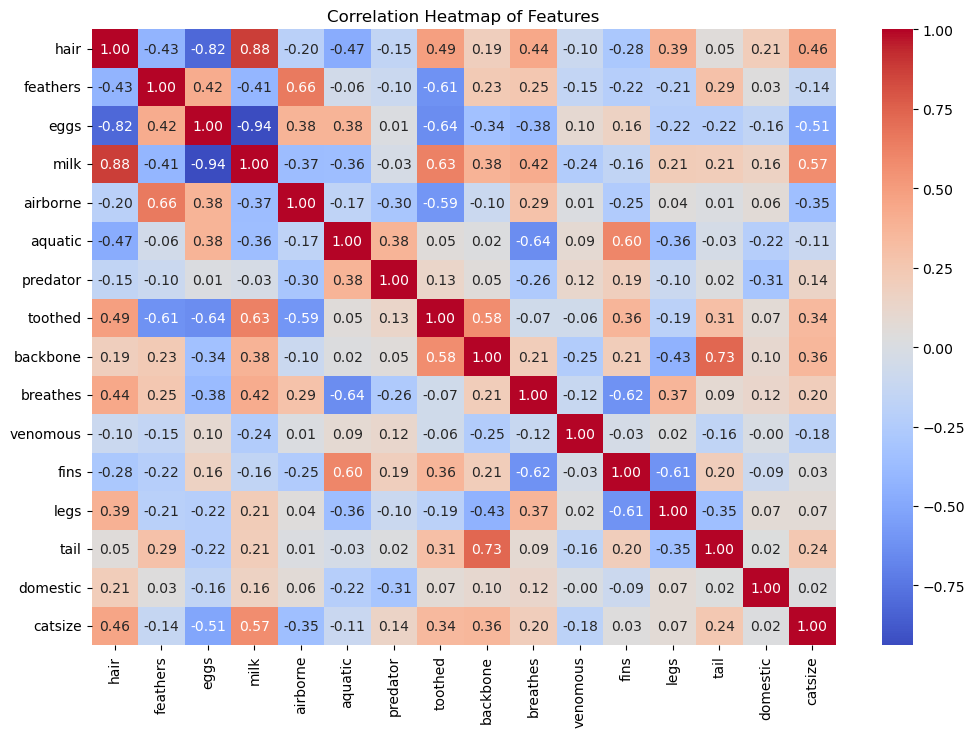

In [4]:
plt.figure(figsize=(12, 8))
numerical_cols = zoo.select_dtypes(include=['int64', 'float64']).columns.drop(['type'])
sns.heatmap(zoo[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')

# Preprocess the data by handling missing values & Outliers, if any

missing/null values

In [5]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

Drop 'animal name' column as it's not needed

In [6]:
zoo.drop('animal name', axis=1, inplace=True)

# Split the dataset into training and testing sets (80% training, 20% testing).

In [7]:
X = zoo.drop('type', axis=1)
y = zoo['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the features (normalize data)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset.Choose an appropriate distance metric and value for K.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

# Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [10]:
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [11]:
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Performance Metrics:
Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1-Score: 0.93

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



# Visualize the decision boundaries of the classifier.

Bar plot of actual vs predicted types

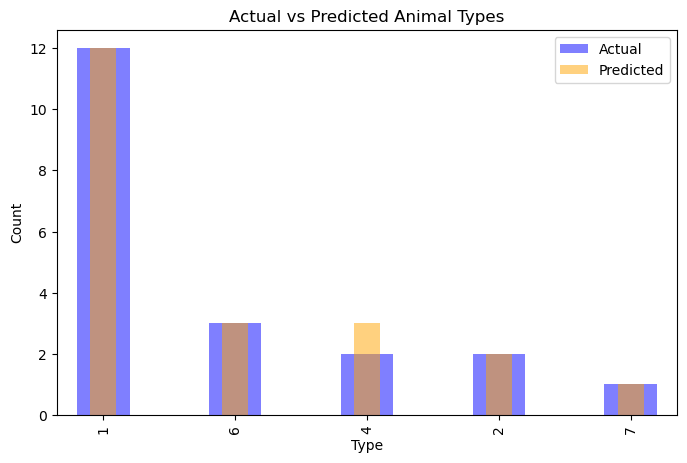

In [12]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(8, 5))
results['Actual'].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Actual', width=0.4)
results['Predicted'].value_counts().plot(kind='bar', color='orange', alpha=0.5, label='Predicted', width=0.2)
plt.title('Actual vs Predicted Animal Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend()

# Interview Questions

**1. What are the key hyperparameters in KNN?**

| Hyperparameter    | Description                                                                                             |
| ----------------- | ------------------------------------------------------------------------------------------------------- |
| **`n_neighbors`** | The number of neighbors to consider (i.e., the **k** in KNN).                                           |
| **`weights`**     | How to weight the votes: `'uniform'` (equal weight) or `'distance'` (closer neighbors get more weight). |
| **`metric`**      | The **distance metric** used to measure similarity (e.g., Euclidean).                                   |
| **`algorithm`**   | The method used to compute neighbors: `'auto'`, `'ball_tree'`, `'kd_tree'`, `'brute'`.                  |
| **`leaf_size`**   | Affects tree-based search speed and memory usage. Mostly useful with `'kd_tree'` or `'ball_tree'`.      |

**2. What distance metrics can be used in KNN?**

| Metric        | Description                      | Usage Value in KNN            |
| ------------- | -------------------------------- | ----------------------------- |
| **Euclidean** | Straight-line distance (default) | `'euclidean'` or `p=2`        |
| **Manhattan** | Grid-based distance (L1 norm)    | `'manhattan'` or `p=1`        |
| **Minkowski** | Generalized form of distance     | `'minkowski'`, `p` can be set |
| **Cosine**    | Measures angle between vectors   | `'cosine'`                    |
| **Hamming**   | For categorical or binary data   | `'hamming'`                   |